# Projet numérique - équations différentielles

### Guillaume Ramos & Colin Vignon

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de la manière suivante : $\dot{x}_1 = x_1(\alpha−\beta x_2) \\ \dot{x}_2 = −x_2(\gamma − \delta x_1)$ où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha, \beta, \gamma, \delta$ sont des paramètres strictement positifs.

## Question 1

Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre (0,0) et $\bar{x} \in \mathbb{R}^{*+} \times \mathbb{R}^{*+}$. Que peut-on dire de leur stabilité à ce stade ?

### Réponse

On a : $\dot x_{1}=x_{1}(\alpha-\beta x_{2}) \\ \dot x_{2}= -x_{2}(\gamma-\delta x_{1}) \\$ C'est à dire $\begin{bmatrix}
\dot x_{1} \\ \dot x_{2}\end{bmatrix} = f(x_{1},x_{2})=\begin{bmatrix}x_{1}(\alpha-\beta x_{2})
 \\-x_{2}(\gamma-\delta x_{1})
\end{bmatrix}
\\ $ Le terme $\alpha$ correspond à l'augmentation du nombre de proies donc à leur reproduction, $\beta$ à la diminution du nombre de proies en raison des prédateurs, $\gamma$ à la diminution du nombre de prédateurs liée à leur mort indépendamment des proies et  $\delta$ à l'augmentation du nombre de prédateurs liée à capacité à se nourrir c'est à dire à chasser les proies. Le point (0,0) est clairement un point d'équilibre car $f(0,0) = \begin{bmatrix}
0 \\0\end{bmatrix} \\ $
Recherchons un éventuel autre point d'équilibre en résolvant  $f(x_{1},x_{2})=\begin{bmatrix}
0 \\0
\end{bmatrix}\Leftrightarrow \begin{bmatrix}x_{1}(\alpha-\beta x_{2})
 \\-x_{2}(\gamma-\delta x_{1})
\end{bmatrix}=\begin{bmatrix}0\\0\end{bmatrix} \\ \Leftrightarrow \begin{bmatrix}
x_{2}\gamma\\x_{1}\alpha\end{bmatrix} = \begin{bmatrix}
 \delta x_{1} x_{2}\\ \beta x_{1} x_{2}\end{bmatrix} $. Si l'un des $x_{i}$ est nul, on retrouve le point (0,0). Supposons  $x_{1}$ non nul. Alors $x_{2}$ est non nul et $\begin{bmatrix}
 x_{1}\\ x_{2}\end{bmatrix} = \begin{bmatrix}
\gamma/\delta \\ \alpha / \beta\end{bmatrix}$.  Il en va de même si on suppose $x_{2}$ non nul. On a donc $\overline{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) \in \mathbb{R}^{* +} \times \mathbb{R}^{* +}$ car les paramètres sont tous strictement positifs. f est clairement continûment différentiable, et on a $J_{f}(x_{1},x_{2}) = \begin{bmatrix}
\alpha-\beta x_{2} & -x_{1}\beta \\
\delta x_{2} & \delta x_{1} - \gamma\end{bmatrix} \\
$. Etudions la stabilité du point (0,0) : $ \left| xI-J_{f}(0,0) \right|= (x-\alpha)(x+\gamma) \\
\alpha $ est valeur propre de $J_{f}(0,0)$ à partie réelle strictement positive donc (0,0) est instable. Etudions la stabilité du point $\overline{x}$ : $\left| xI-J_{f}(\gamma/\delta,\alpha/\beta) \right|= x^{2} + \alpha\gamma$. Les valeurs propres de $J_{f}(\overline{x})$ sont imaginaires pures donc on ne peut pas conclure sur la stabilité de $\overline{x}$.

## Question 2

A l'aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.

### Réponse :

In [1]:
# Python Standard Library
# -----------------------
pass

In [2]:
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import math
import autograd
import autograd.numpy as np

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

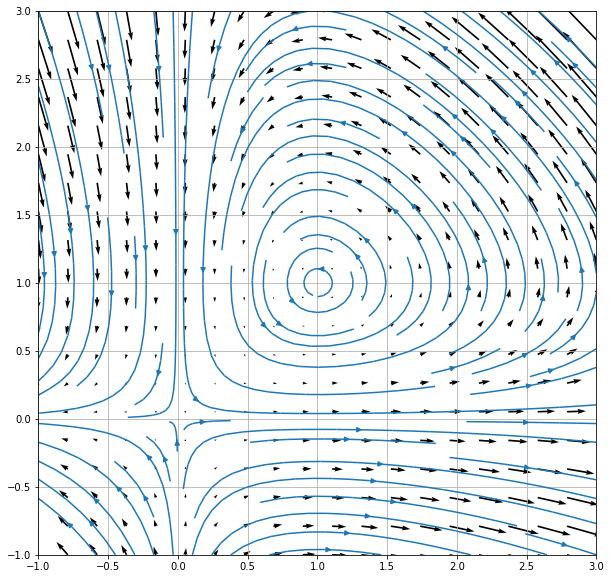

In [3]:
fig, ax = plt.subplots()

a = 1  # Les paramètres alpha, beta, delta et gamma
b = 1
d = 1
g = 1

x = np.linspace(-1, 3, 20)
y = np.linspace(-1, 3, 20)
X, Y = np.meshgrid(x, y)
dx = X*(a - b*Y)
dy = -Y*(g - d*X)
q = ax.quiver(X, Y, dx, dy)
plt.streamplot(X, Y, dx, dy)
plt.grid()

X et Y représentant les nombres de proies et prédateurs, on se concentre sur la partie $\mathbb{R}^{*+} \times \mathbb{R}^{*+}$ du graphe. En partant d'un point de cette zone, les solutions devraient suivre environ les lignes bleues.

## Question 3 

Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}^{*+} \times \mathbb{R}^{*+}$ reste dans $\mathbb{R}^{*+} \times \mathbb{R}^{*+}$ sur son ensemble de définition.

### Réponse

On remarque que les axes $y=0$ et $x=0$ sont solutions des équations. En effet, $(e^{\alpha t},0)$ et $(0,e^{-\gamma t})$ sont clairement des solutions. Par le théorème de Cauchy-Lipchitz, deux trajectoires ne peuvent pas se croiser donc aucune solution initialisée sur $\mathbb{R}_{>0}\times \mathbb{R}_{>0}$ ne peut croiser un des axes. Ces solutions restent donc dans $\mathbb{R}_{>0}\times \mathbb{R}_{>0}$

## Question 4 

On considère la fonction $\text{H}(x_1, x_2) = \delta x_1  -  \gamma ln(x_1) + \beta x_2 - \alpha ln(x_2)$
définie sur $(\mathbb{R}^{*+})^{2}$. Calculer la dérivée de $\text{H}$ le long des solutions initialisées dans $(\mathbb{R}^{*+})^{2}$. En déduire que toute solution maximale initialisée dans $(\mathbb{R}^{*+})^{2}$ est définie sur $\mathbb{R}.$

### Réponse

Soient $(x_1, x_2) \in (\mathbb{R}^{*+})^2, t \in \mathbb{R}.$ On a : $\frac{d H}{dt}(t) = \delta \dot{x_1}(t) - \gamma \frac{\dot{x_1}}{x_1}(t) + \beta \dot{x_2}(t) - \alpha \frac{\dot{x_2}}{x_2}(t). $ Si l'on se place le long des solutions initialisées dans $(\mathbb{R}^{*+})^2$, on a alors $ \delta x_1(t) - \gamma = \frac{\dot{x_2}}{x_2}(t)$  et $\beta x_2(t) - \alpha = -\frac{\dot{x_1}}{x_1}(t)$, d'où  $\frac{d H}{dt}(t) = \frac{\dot{x_1}\dot{x_2}}{x_1 x_2}(t) - \frac{\dot{x_1}\dot{x_2}}{x_1 x_2}(t) = 0.$ Donc H est constante le long de ces solutions. Posons $X = \mathbb{R} \times (\mathbb{R}^{*+})^2 $. Toute solution est définie sur un intervalle $\text{]}t_i ; t_f \text{[}$ avec $(t_i,t_f) \in \mathbb{R} \cup{\left\{ - \infty, + \infty \right\}}$ d'après le théorème de domaine maximal d'existence. Supposons maintenant par l'absurde que $t_i$ soit fini. D'après ce théorème, soit $\lim_{t \to t_i} d((t, x(t)), \partial(X)) = 0$, soit $\lim_{t \to t_i} \left\| x \right\| = + \infty$. Si $\lim_{t \to t_i} d((t, x(t)), \partial(X)) = 0$, alors cela signifie que x atteint la frontière de $(\mathbb{R}^{*+})^2 $. Or si $ x_1 \to 0 $, comme  $\alpha,\gamma>0$, alors $H \to -\infty$, or $H = constante$, donc $x_1$ ne tend pas vers 0. De même pour la limite $x_1 \to +\infty$. Il en va de même pour $x_2$, et donc on n'a pas  $\lim_{t \to t_i} d((t, x(t)), \partial(X)) = 0$. Ni également $\lim_{t \to t_i} \left\| x \right\| = + \infty$. Donc $t_i$ est non-fini, et vaut donc -$\infty$. Il en est de même pour $t_f$, qui vaut donc $+\infty$. Et donc toute solution maximale initialisée dans $(\mathbb{R}^{*+})^{2}$ est définie sur $\mathbb{R}$.

## Question 5

Représenter les courbes de niveau de H. Où se trouve  $\bar{x}$ ? Qu'en conclut-on sur le comportement des solutions ? En déduire (graphiquement) que  $\bar{x}$ est stable, au sens de la définition de stabilité.

### Réponse

In [4]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

    
def H(x1, x2):
    return d * x1 - g*np.log(x1) + b*x2 - a*np.log(x2)

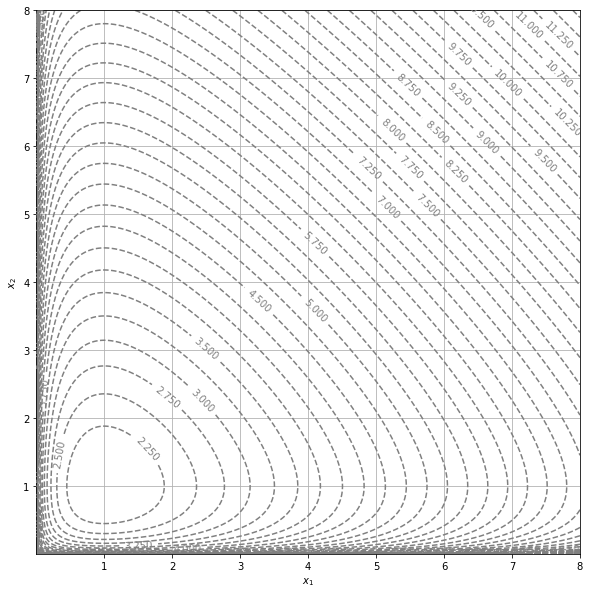

In [5]:
display_contour(
    H,
    x=np.linspace(0.001, 8.0, 1000), 
    y=np.linspace(0.001, 8.0, 1000), 
    levels=50)



D'après la question 1 (pour les valeurs choisies des paramètres) on a $\bar{x} = (1, 1)$. On l'identifie graphiquement comme le creux des courbes de niveau de H sur la figure. D'après la question 4, le long d'une solution maximale initialisée dans $(\mathbb{R}^{*+})^2$, H est constante, donc $(x_1, x_2)$ devrait parcourir une des lignes de niveaux de la forme de celles ci-dessus. En prenant un epsilon suffisamment large, toute solution maximale devrait donc vérifier : $\forall t \in \mathbb{R},$ $\left\| x(t) - \bar x \right\| \le \varepsilon$. Donc $\bar x$ est stable.

## Question 6

On souhaite maintenant simuler numériquement les trajectoires. Coder une fonction du type def solve_euler_explicit(f, x0, dt, t0, tf): ...return t, x prenant en entrée une fonction $f:\mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n $ quelconque, une condition initiale x0, un pas de temps dt, les temps initiaux et finaux, et renvoyant le vecteur des temps tj et de la solution xj du schéma d’Euler explicite appliqué à $ \dot{x}=f(t,x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque dt tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

### Réponse

In [6]:
def solv_euler_explicit(f, x0, dt, t0, tf):
    n = int((tf-t0)//dt)  # Le nombre d'itérations
    t = np.zeros((n+1, 1))
    X = np.zeros((n+1, np.shape(x0)[0]))
    X[0] = x0.reshape(1, np.shape(x0)[0])
    t[0] = t0
    for i in range(0,n):
        ti = t0 + (i+1)*dt
        t[i+1] = ti
        X[i+1] = X[i] + dt*(f(ti, X[i]).reshape(1, np.shape(x0)[0]))
    return X, t

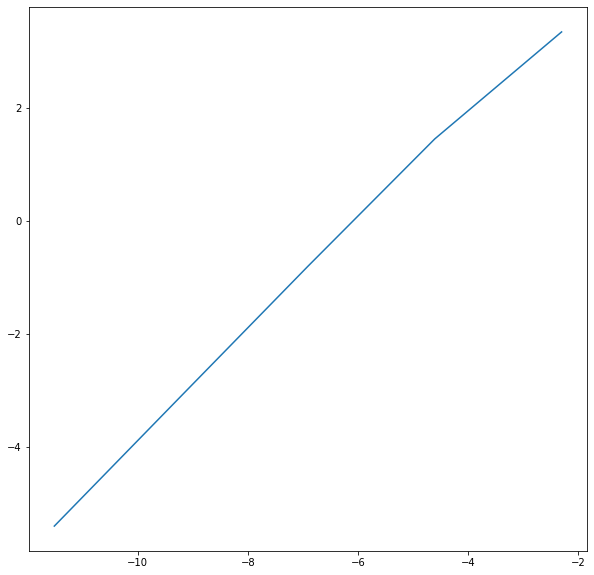

In [7]:
X0 = np.zeros((5,1))
Xi = np.array([3*np.exp(3)]*5).reshape(5,1)


X1, t1 = solv_euler_explicit(lambda t, x : 3*x, np.array([3]), 0.1, 0, 1)
X0[0] = X1[-1]
X2, t = solv_euler_explicit(lambda t, x : 3*x, np.array([3]), 0.01, 0, 1)
X0[1] = X2[-1]
X3, t = solv_euler_explicit(lambda t, x : 3*x, np.array([3]), 0.001, 0, 1)
X0[2] = X3[-1]
X4, t = solv_euler_explicit(lambda t, x : 3*x, np.array([3]), 0.0001, 0, 1)
X0[3] = X4[-1]
X5, t = solv_euler_explicit(lambda t, x : 3*x, np.array([3]), 0.00001, 0, 1)
X0[4] = X5[-1]


h = np.array([0.1, 0.01, 0.001, 0.0001, 0.00001]).reshape(5,1)  # Le tableau des h correspond aux différents dt
plt.plot(np.log(h), np.log(abs(X0- Xi)))


plt.show()

On observe donc bien que quand dt tend vers 0, la solution calculée converge vers la solution réelle. La pente de 1 correspond à l'ordre de convergence, qui vaut bien 1 selon un exemple du cours.

## Question 7

Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-Volterra. Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction H.

### Réponse

In [8]:
def f(t, x):
    x1 = x[0]
    x2 = x[1]
    return np.array([[x1*(1 - x2)], [-x2*(1 - 1*x1)]])

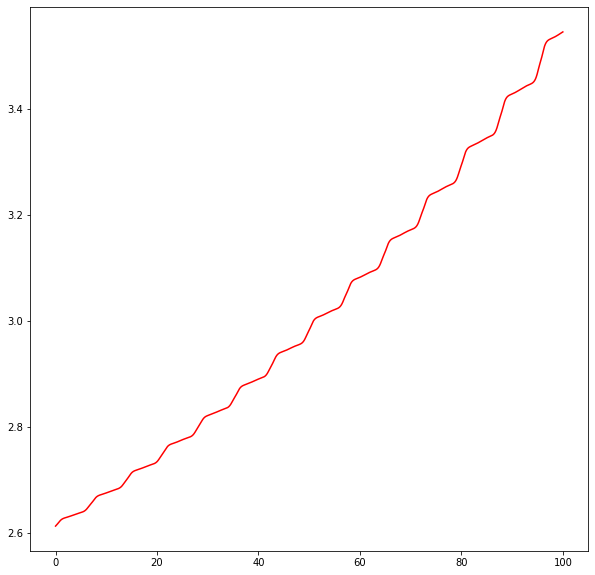

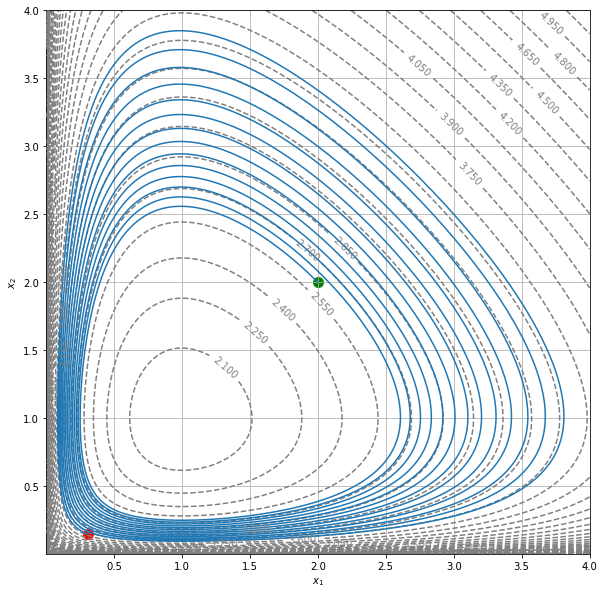

In [9]:
X, t = solv_euler_explicit(f, np.array([[2], [2]]), 0.01, 0, 100)
x1 = X[:,0]
x2 = X[:,1]
H0 = H(x1, x2)


plt.plot(t, H0, color = 'r')
plt.show()


display_contour(
    H,
    x=np.linspace(0.001, 4.0, 1000), 
    y=np.linspace(0.001, 4.0, 1000), 
    levels=100)


plt.plot(x1, x2)
plt.scatter(2, 2, s = 100, color = 'green' )  # On visualise le point de départ...
plt.scatter(X[-1][0], X[-1][1], s = 100, color = 'red')  # Et celui d'arrivée 


plt.show()

On constate donc qu'en temps long, la solution calculée diverge de la solution réelle. En effet, on ne suit plus une ligne de niveau, et H n'est pas constante (ces deux constatations étant équivalentes).

## Question 8

Coder maintenant une fonction du type def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):...return t, x   donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f(t,x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

### Réponse

In [10]:
def solv_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    n = int((tf-t0)//dt)
    t = np.zeros((n+1, 1))
    X = np.zeros((n+1, np.shape(x0)[0]))
    X[0] = x0.reshape(1, np.shape(x0)[0])
    t[0] = t0
    for i in range(0,n):
        it = 0
        ti = t0 + (i+1)*dt
        t[i+1] = ti
        X[i+1] = X[i] + dt*(f(ti, X[i]).reshape(np.shape(x0)[0],))
        ancien_x = X[i+1]
        prochain_x = X[i+1] + dt*(f(ti, ancien_x).reshape(np.shape(x0)[0],))
        while it < itermax :
            ancien_x = prochain_x
            prochain_x = X[i+1] + dt*(f(ti, ancien_x).reshape(np.shape(x0)[0],))
            it += 1
        X[i+1] = prochain_x
    return X, t

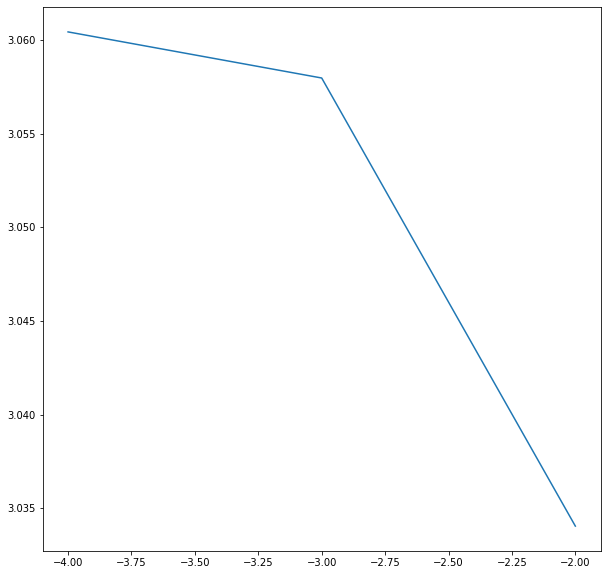

In [11]:
X0 = np.zeros((3,1))
Xi = np.array([3*np.exp(3)]*3).reshape(3,1)


X2, t = solv_euler_implicit(lambda t, x : 3*x, np.array([3]), 0.01, 0, 1, 10)
X0[0] = X2[-1]
X3, t = solv_euler_implicit(lambda t, x : 3*x, np.array([3]), 0.001, 0, 1, 10)
X0[1] = X3[-1]
X4, t = solv_euler_implicit(lambda t, x : 3*x, np.array([3]), 0.0001, 0, 1, 10)
X0[2] = X4[-1]


h = np.array([0.01, 0.001, 0.0001]).reshape(3,1)
plt.plot(np.log10(h), np.log10(abs(X0- Xi)))


plt.show()


De même que pour le modèle explicite, le schéma d'Euler implicite est convergent d'ordre 1. On devrait aussi avoir une pente de un mais ce n'est pas ce qu'on observe ici...

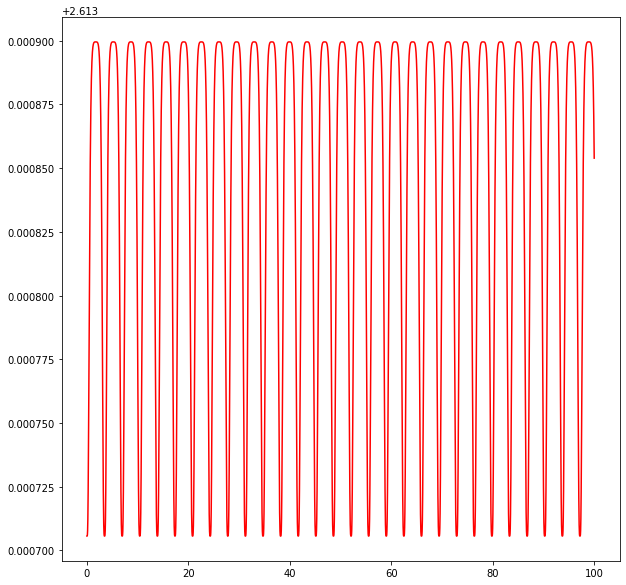

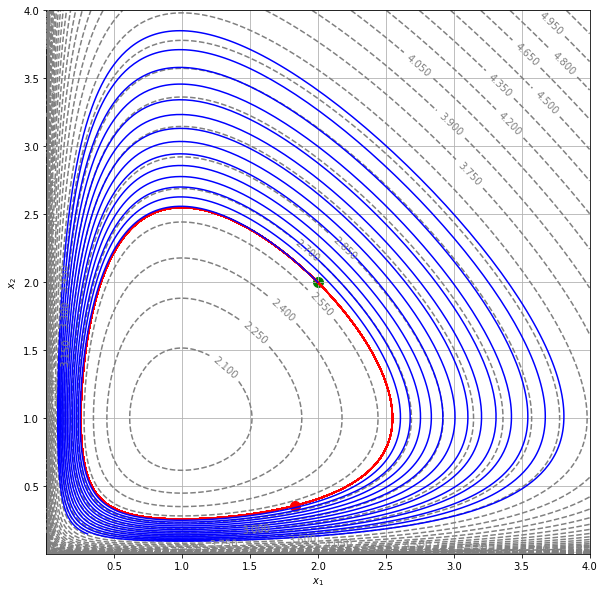

In [13]:
X,t = solv_euler_implicit(f, np.array([[2], [2]]), 0.01, 0, 100, 10)
x1 = X[:, 0]
x2 = X[:, 1]
H0 = H(x1, x2)
plt.plot(t, H0, color = 'red')


display_contour(
    H,
    x=np.linspace(0.001, 4.0, 1000), 
    y=np.linspace(0.001, 4.0, 1000), 
    levels=100)
plt.plot(x1, x2, color = 'r')  # la nouvelle solution (Euler implicite)
plt.scatter(2, 2, s = 100, color = 'green' )  # On visualise le point de départ...
plt.scatter(X[-1][0], X[-1][1], s = 100, color = 'red')  # Et celui d'arrivée de Euler implicite


X2, t2 = solv_euler_explicit(f, np.array([[2], [2]]), 0.01, 0, 100)
x12 = X2[:,0]
x22 = X2[:,1]
plt.plot(x12, x22, color = 'blue')  # l'ancienne (Euler explicite)


plt.show()

Le résultat est donc bien meilleur.



On propose maintenant de modifier ces schémas de façon à stabiliser H et assurer sa conservation le long des solutions numériques.

### Question 9

Expliquer pourquoi les solutions de : $\dot{x}_1=x_1(\alpha − \beta x_2) − u_1(x_1,x_2)(H(x_1,x_2)−H0)\\ \dot{x}_2=−x_2(\gamma−\delta x_1)−u_2(x_1,x_2)(H(x_1,x_2)−H0)$ sont identiques à celles de Lotka-Volterra si H0 = H(x(0)) pour tout choix de $u:\mathbb{R}^2 \to \mathbb{R}^2$ continûment différentiable.

### Réponse

Considérons le nouveau système : $ \\ \dot x_{1}=x_{1}(\alpha-\beta x_{2})-u_{1}(x_{1},x_{2})(H(x_{1},x_{2})-H_{0})\\ \dot x_{2}= -x_{2}(\gamma-\delta x_{1})-u_{2}(x_{1},x_{2})(H(x_{1},x_{2})-H_{0}) \\  $ On remarque en particulier que les solutions du premier système sont solutions du nouveau système. En effet, $H$ est alors constante égale à $H(x(0))=H_{0}$, et on retrouve alors le système initial. 
$ \\ \dot x_{1}=x_{1}(\alpha-\beta x_{2})\\ \dot x_{2}= -x_{2}(\gamma-\delta x_{1}) $

## Question 10

Soit $\text{H0} \in \mathbb{R}$. Calculer la dérivée de $\text{H−H0}$ le long des solutions de ce nouveau système. Montrer que l’on peut choisir u tel que $\frac{d}{dt}(\text{H(x(t))−H0}) = −2k \left\| \nabla{\text{H(x(t))}}\right\| \text{(H(x(t))−H0)}$. En déduire qu’alors $\text{H(x(t))}$ converge exponentiellement vers $\text{H0}$ lorsque t tend vers l’infini si x reste à une distance strictement positive de $\bar{x}$.

### Réponse

On a :  $ \frac{d }{dt}(H(x(t)-H_{0}) =\delta\dot x_{1}+\beta\dot x_{2}-\gamma\frac{\dot x_{1}}{x_{1}}-\alpha \frac{\dot x_{2}}{x_{2}} \\=(x_{1}(\alpha-\beta x_{2})-u_{1}(x_{1},x_{2})(H(x_{1},x_{2})-H_{0}))(\delta-\frac{\gamma}{x_{1}})+(-x_{2}(\gamma-\delta x_{1})-u_{2}(x_{1},x_{2})(H(x_{1},x_{2})-H_{0}))(\beta-\frac{\alpha}{x_{2}}) \\=-u_{1}(x_{1},x_{2})(H(x_{1},x_{2})-H_{0})(\delta-\frac{\gamma}{x_{1}})-u_{2}(x_{1},x_{2})(H(x_{1},x_{2})-H_{0})(\beta-\frac{\alpha}{x_{2}}) \\=-(H(x_{1},x_{2})-H_{0})[(\delta-\frac{\gamma}{x_{1}})u_{1}(x_{1},x_{2})+(\beta-\frac{\alpha}{x_{2}})u_{2}(x_{1},x_{2})] \\ $
On cherche donc $u$ tel que $k\left\| \nabla H(x(t)) \right\|^{2}=(\delta-\frac{\gamma}{x_{1}})u_{1}(x_{1},x_{2})+(\beta-\frac{\alpha}{x_{2}})u_{2}(x_{1},x_{2}) \\ $ Comme $\nabla H(x_{1},x_{2})=\begin{bmatrix}
 \delta-\frac{\gamma}{x_{1}}\\\beta-\frac{\alpha}{x_{2}}
\end{bmatrix}$ , on prend $u(x_{1},x_{2})=k\nabla H$ et on obtient ainsi $\frac{d }{dt}(H(x(t)-H_{0}) =-k\left\| \nabla H(x(t)) \right\|^{2}(H(x(t)-H_{0})$

Ainsi, si x reste à une distance strictement positive $\epsilon$ de  $\overline{x}$, il existe un c dans $\mathbb{R}$ tel que $\left\| \nabla H(t)) \right\|^{2}=(\delta-\frac{\gamma}{x_{1}})^{2}+(\beta-\frac{\alpha}{x_{2}})^{2}\ge c\gt 0$ En effet, $\left\| \nabla H(t)) \right\|^{2}$ est une somme de carrés qui s'annulent simultanément si et seulement si $x=\overline{x}$ et on obtient l'existence de c en appliquant le théorème de Weierstrass à chacun de ces termes, qui sont  continus par rapport à leur variable. On a donc $\frac{d }{dt}(H(t)-H_{0}) \le  -kc^{2}(H(t)-H_{0})$ Et donc $ln(\left| H(t)-H_{0} \right|)\le -kc^{2}t$ par croissance de l'intégrale et intégration entre t=0 et t.



Ainsi, $\left| H(t)-H_{0} \right|\le e^{-kc^{2}t}$, et en choisissant $k>0$, $\lim_{t \to +\infty }H(t))=H_{0}$ et la convergence est exponentielle.

## Question 11

En déduire comment modifier l’implémentation du schéma d’Euler pour assurer la stabilité de $\text{H}$. Quel est le rôle de k ? Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $\text{H}(x^{j+1})−\text{H}(x_0)$ en fonction de $\text{H}(x^{j})−\text{H}(x_0)$ au premier ordre en dt.

### Réponse

On modifie donc notre code précédent en ajoutant dans le système d'équations différentielles la fonction u trouvée précédemment, pour assurer la stabilité de H. 
Au premier ordre, en utilisant $\frac{d }{dt}(H(x(t)-H_{0}) =-k\left\| \nabla H(x(t)) \right\|^{2}(H(x(t)-H_{0})$, on a : $(H(x^{j+1})-H_0)- (H(x^{j})-H_0) = - k\left\| \nabla H(x(t)) \right\|^{2}dt$, et donc :  $H(X^{j+1})-H_0 = (1- k\left\| \nabla H(x(t)) \right\|^{2}dt)(H(x^{j})-H_0)$. Or d'après Q10, $H$ converge exponentiellement vers $H_0$, le signe de $H-H_0$ est donc constant. Or si on choisit un k trop grand, on aura $1- k\left\| \nabla H(x(t)) \right\|^{2}dt <0 $ et donc le signe de la différence qui change à chaque itération, et donc pas de convergence exponentielle.